In [20]:
import pandas as pd
data = pd.read_csv('titatnicdata.csv')


In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

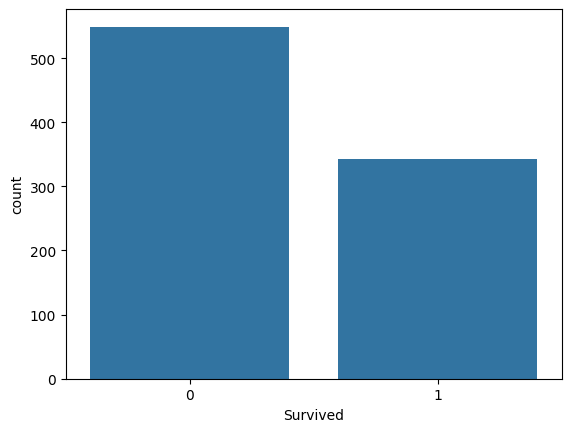

In [23]:
import seaborn as sb

sb.countplot(x='Survived',data=data)

<Axes: xlabel='Survived', ylabel='count'>

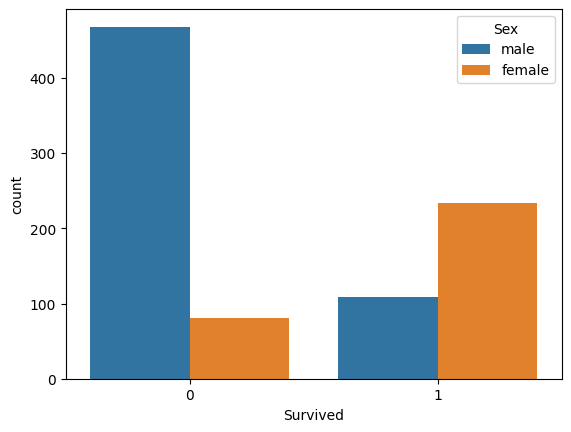

In [24]:
sb.countplot(x='Survived', data=data, hue="Sex")

In [25]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

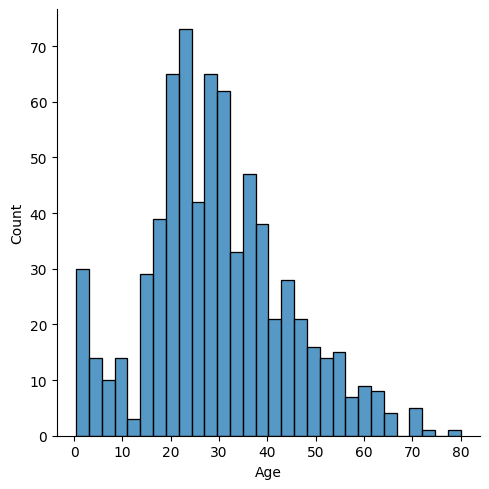

In [26]:
sb.displot(data['Age'].dropna(), kde=False, bins=30)

In [27]:
data['Age'].mean()

29.69911764705882

In [28]:
data['Age'] = data['Age'] = fillna = data['Age'].mean()

In [29]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:

data.drop('Cabin', axis=1, inplace=True)

In [31]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [32]:
data.dropna(inplace=True)

In [33]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
data = data.drop(['Name', 'Ticket', "PassengerId"], axis=1)

In [37]:
dummies_sex = pd.get_dummies(data["Sex"], drop_first=True  )

In [38]:
data = data.join(dummies_sex)
data = data.drop('Sex', axis=1)

In [39]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,29.699118,1,0,7.2500,S,True
1,1,1,29.699118,1,0,71.2833,C,False
2,1,3,29.699118,0,0,7.9250,S,False
3,1,1,29.699118,1,0,53.1000,S,False
4,0,3,29.699118,0,0,8.0500,S,True


<Axes: xlabel='Survived', ylabel='count'>

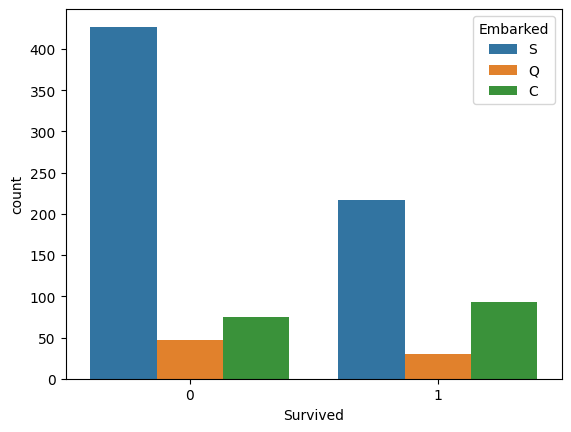

In [40]:
sb.countplot(x='Survived', data=data, hue="Embarked")

In [41]:
dummies_embarked = pd.get_dummies(data["Embarked"], drop_first=True  )
data = data.join(dummies_embarked)
data = data.drop('Embarked', axis=1)

<Axes: >

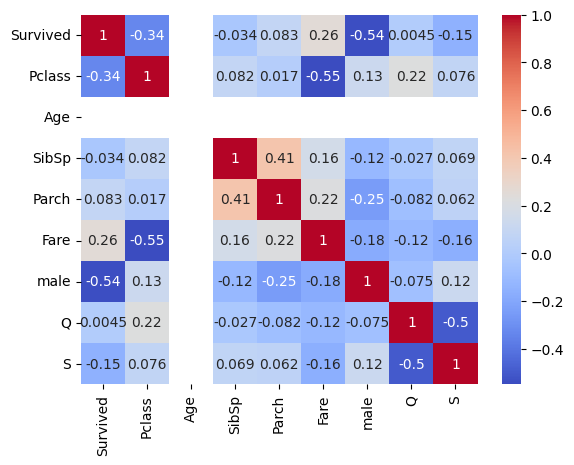

In [42]:
sb.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Survived', ylabel='count'>

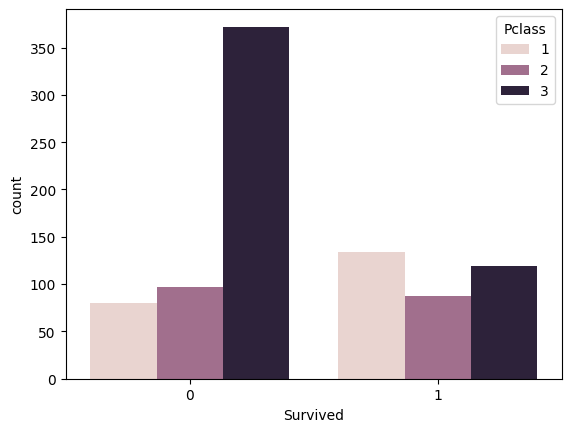

In [43]:
sb.countplot(x='Survived', data=data, hue="Pclass") 

In [44]:
X = data.drop('Survived', axis=1)
y = data['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
predictions = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.8033707865168539

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       116
           1       0.70      0.76      0.73        62

    accuracy                           0.80       178
   macro avg       0.78      0.79      0.79       178
weighted avg       0.81      0.80      0.81       178



In [50]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[96 20]
 [15 47]]


In [53]:
pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Predicted no', 'Predicted yes'], index=['Actual no', 'Actual yes'])

,Predicted no,Predicted yes
Actual no,96,20
Actual yes,15,47


In [57]:
new_person = [3, 35, 0, 0, 10, 1, 0, 0]
prediction = model.predict([new_person])

if prediction == 1:
    print("Survived")
else:
  print("Did not survive")

Did not survive


/Users/simohayha/.pyenv/versions/3.11.7/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
